# Twitter Sentiment Analysis
<br>
Entity-level sentiment analysis on multi-lingual tweets.

In [338]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

# make with this report 
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# columns transformer 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Alogrithim 
# Alogrithim 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Hyperpearmeter turning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, GridSearchCV


# text preprocessing 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## model accuary metrices 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## dorp the model in pickle 
import pickle

# Load the data


In [339]:
# Define column names
column_names = ['Tweet ID','entity', 'sentiment', 'Tweet content']
twitter_Sentiment = pd.read_csv("D:\\Twitter-Sentiment-Analysis\\data\\twitter_training.csv",names=column_names,nrows=1000)
twitter_Sentiment.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Now making the report of the twitter sentiment using pandas priflling 

In [340]:
from pandas_profiling import ProfileReport  # Ensure you have this library installed


profile = ProfileReport(twitter_Sentiment, title="Pandas Profiling Report", explorative=True)

# Generate the report
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [341]:
# Drop unnecessary columns
columns_to_drop = ['Tweet ID', 'entity']
twitter_Sentiment = twitter_Sentiment.drop(columns=columns_to_drop)

In [342]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [343]:
twitter_Sentiment['sentiment'].value_counts()

sentiment
Positive      424
Neutral       282
Negative      192
Irrelevant    102
Name: count, dtype: int64

In [344]:
twitter_Sentiment.shape

(1000, 2)

In [345]:
twitter_Sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment      1000 non-null   object
 1   Tweet content  996 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


In [346]:
## checking the values of the data
null_values = twitter_Sentiment.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 sentiment        0
Tweet content    4
dtype: int64


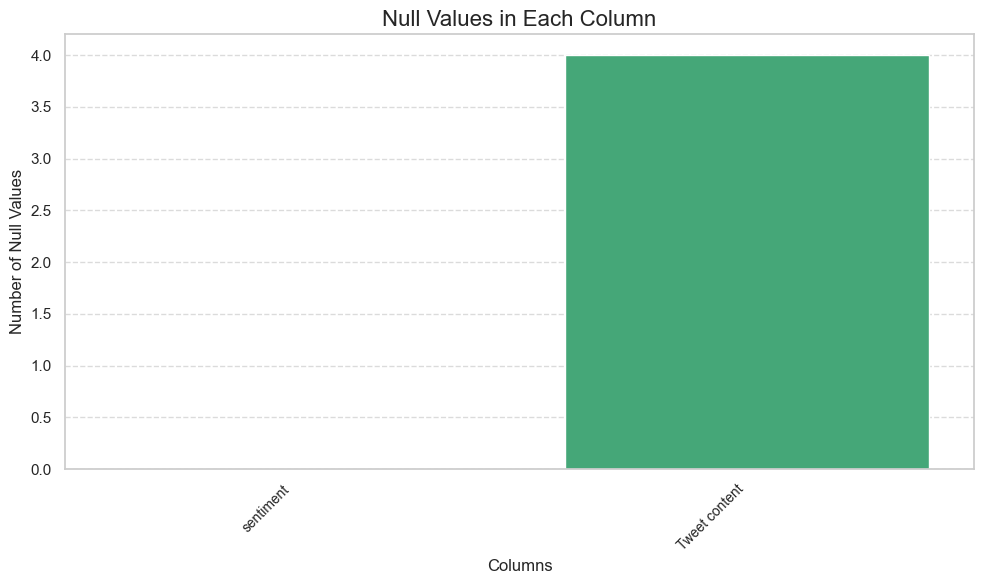

In [347]:
# Plot the null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_values.index, y=null_values.values, palette='viridis')

# Add plot labels and title
plt.title("Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Null Values", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [348]:
# Calculate percentage of null values in each column
null_percentage = twitter_Sentiment.isnull().mean() * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
sentiment        0.0
Tweet content    0.4
dtype: float64


In [349]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [350]:
# Initialize SimpleImputer to fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the 'Tweet content' column to fill missing values
# Note: .ravel() is used to flatten the 2D array into 1D
twitter_Sentiment['Tweet content'] = imputer.fit_transform(twitter_Sentiment[['Tweet content']]).ravel()

In [351]:
# Calculate percentage of null values in each column
null_percentage = twitter_Sentiment.isnull().mean() * 100

# Display the percentages
print("Percentage of Null Values in Each Column:")
print(null_percentage)

Percentage of Null Values in Each Column:
sentiment        0.0
Tweet content    0.0
dtype: float64


In [352]:
# Check for duplicate rows in the entire dataframe
duplicates = twitter_Sentiment[ twitter_Sentiment.duplicated() ]

# If you want to check the number of duplicates
num_duplicates = twitter_Sentiment.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)



Number of duplicate rows: 38


In [353]:
# Remove duplicate rows
twitter_Sentiment = twitter_Sentiment.drop_duplicates()


In [354]:
# If you want to check the number of duplicates
twitter_Sentiment.duplicated().sum()

np.int64(0)

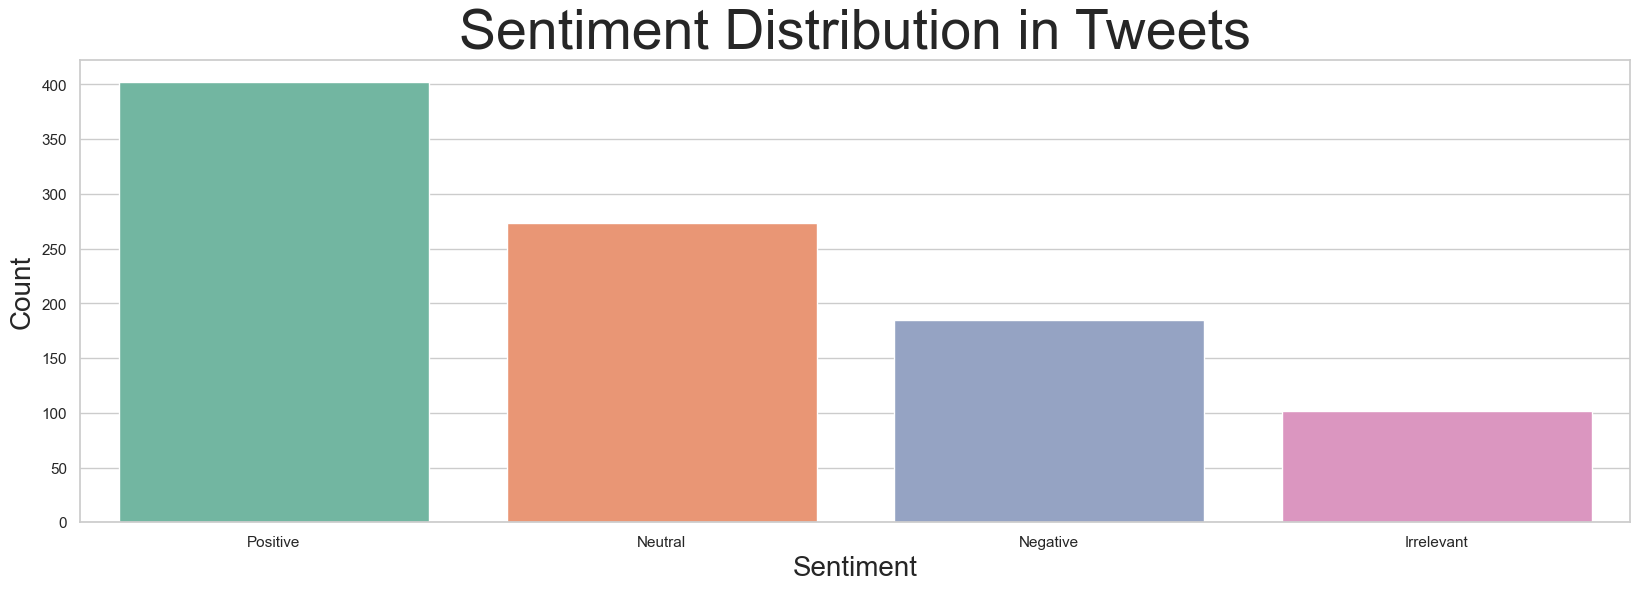

In [355]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plot the count of sentiment categories
plt.figure(figsize=(20, 6))
sns.countplot(data=twitter_Sentiment, x='sentiment', palette='Set2')

# Add labels and title
plt.title('Sentiment Distribution in Tweets',fontsize = 40)
plt.xlabel('Sentiment',fontsize = 20)
plt.ylabel('Count',fontsize = 20)

# Show the plot
plt.show()

In plot the Negative sentiment count is greater than the Positive sentiment count 

# LabelEncoding

In [356]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to a categorical column (e.g., 'author_id')
twitter_Sentiment['sentiment'] = encoder.fit_transform(twitter_Sentiment['sentiment'])

In [357]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [403]:
twitter_Sentiment['sentiment'].value_counts()

sentiment
3    402
2    273
1    185
0    102
Name: count, dtype: int64

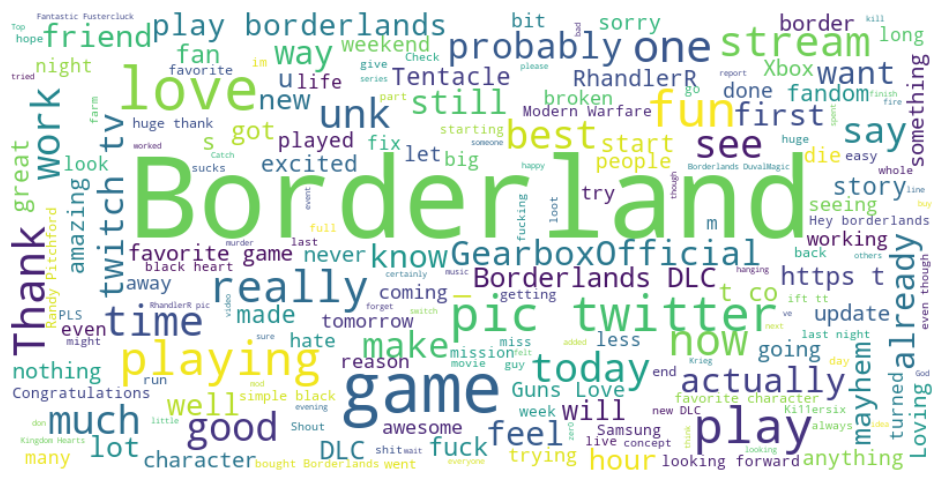

In [358]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Assuming you have a column 'Tweet content' in your dataframe
text_data = twitter_Sentiment['Tweet content'].dropna().str.cat(sep=' ')  # Combine all the tweets into one string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

Tweet content --> In the text most time used of now,game,play,will,love, people etc.

# Text preprocessing  

In [359]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [360]:
twitter_Sentiment['Tweet content'].sample(5)

196    i then enter in that gunner seat and i fear fo...
657    ‘Borderlands 3’ Putting Its Mayhem Modifiers B...
467                                                  can
597                                     IM SO FUCKING IN
912    @GearboxOfficial Since playing through all of ...
Name: Tweet content, dtype: object

Text prepocessing 
<br>
1 --> lower casing 
<br>
2 --> puncturation
<br> 
3 --> stop word 
<br>
4 ---> Tokenization 
<br>
5 --> stemming 
<br>
6 --> Lemmatization 

Lower casing 

In [361]:
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].str.lower()

In [362]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,i am coming to the borders and i will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [363]:
twitter_Sentiment['Tweet content'][6]

"so i spent a few hours making something for fun. . . if you don't know i am a huge @borderlands fan and maya is one of my favorite characters. so i decided to make myself a wallpaper for my pc. . here is the original image versus the creation i made :) enjoy! pic.twitter.com/mlsi5wf9jg"

Remove the puncturation

In [364]:
import string
exclude  = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [365]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting on borderlands and i will murder yo...
1,3,i am coming to the borders and i will kill you...
2,3,im getting on borderlands and i will kill you ...
3,3,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...


In [366]:
# Remove punctuation from the 'Text' column
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [367]:
# Download the stop words list
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [368]:
# Set of stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'Text' column
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

Handle number

In [369]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)


twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(remove_numbers)
# Output: "rockhard la varlop rare power handsom jackpot borderland xbox dlvritrmtrgf"


In [370]:
twitter_Sentiment['Tweet content'][12]

'rockhard la varlope rare powerful handsome jackpot borderlands  xbox dlvritrmtrgf'

In [371]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting borderlands murder
1,3,coming borders kill
2,3,im getting borderlands kill
3,3,im coming borderlands murder
4,3,im getting borderlands murder


Tokenizers

In [372]:
# Download the tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [373]:
# # Tokenize the 'Text' column
# twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(word_tokenize)


In [374]:
twitter_Sentiment.head()

,sentiment,Tweet content
0,3,im getting borderlands murder
1,3,coming borders kill
2,3,im getting borderlands kill
3,3,im coming borderlands murder
4,3,im getting borderlands murder


In [375]:
# Download necessary NLTK data if not already downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [376]:
from nltk.stem import PorterStemmer
# Initialize PorterStemmer
ps = PorterStemmer()

# Define the transformation function
def transform_text(text):
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [377]:
twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(transform_text)

In [378]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(remove_numbers)

Correct Spelling Using

In [379]:
twitter_Sentiment['Tweet content']

0       im get borderland murder
1               come border kill
2         im get borderland kill
3      im come borderland murder
4       im get borderland murder
                 ...            
994                        sweet
996               who borderland
997               who borderland
998               who borderland
999               who borderland
Name: Tweet content, Length: 962, dtype: object

In [380]:
# import spacy

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Definethe spelling correction function
# def correct_spelling_with_context(tweet):
#     doc = nlp(tweet)
#     corrected = []
#     for token in doc:
#         if token.is_alpha:
#             corrected.append(token.lemma_)
#         else:
#             corrected.append(token.text)
#     return " ".join(corrected)

# twitter_Sentiment["Tweet content"] = twitter_Sentiment["Tweet content"].apply(correct_spelling_with_context)


In [381]:
from textblob import TextBlob

# Define a function to correct the spelling with context
def correct_spelling_with_context(text):
    blob = TextBlob(text)
    return blob.correct().string

# Apply the function to the 'Tweet content' column in your DataFrame
twitter_Sentiment["Tweet content"] = twitter_Sentiment["Tweet content"].apply(correct_spelling_with_context)


In [405]:
twitter_Sentiment['sentiment'].value_counts()

sentiment
3    402
2    273
1    185
0    102
Name: count, dtype: int64

In [382]:
# from textblob import TextBlob

# def correct_spelling(text):
#     return str(TextBlob(text).correct())


# twitter_Sentiment['Tweet content'] = twitter_Sentiment['Tweet content'].apply(correct_spelling)

In [383]:
twitter_Sentiment['Tweet content']


0       in get borderland murder
1               come border kill
2         in get borderland kill
3      in come borderland murder
4       in get borderland murder
                 ...            
994                        sweet
996               who borderland
997               who borderland
998               who borderland
999               who borderland
Name: Tweet content, Length: 962, dtype: object

Model building

In [384]:
twitter_Sentiment.head(10)

,sentiment,Tweet content
0,3,in get borderland murder
1,3,come border kill
2,3,in get borderland kill
3,3,in come borderland murder
4,3,in get borderland murder
5,3,in get borderland murder
6,3,spent hour make cometh fun dont know huge bord...
7,3,spent couple hour cometh fun dont know in huge...
8,3,spent hour cometh fun dont know in huge border...
9,3,spent hour make cometh fun dont know huge rhan...


In [385]:
# Drop column 'B'
X = twitter_Sentiment.drop('sentiment', axis=1)
y = twitter_Sentiment['sentiment'] 

In [386]:
X.head()

,Tweet content
0,in get borderland murder
1,come border kill
2,in get borderland kill
3,in come borderland murder
4,in get borderland murder


In [387]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: sentiment, dtype: int64

In [388]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (962, 1) , shape : (962,) 


In [389]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [390]:
X_train

,Tweet content
484,to u play borderland pretty fun mio anyway wha...
889,unpopular opinion none game good
567,rhandlerr homage friend warrior borderland yes...
292,modern warfare borderland great intend game gr...
113,submit complaint co isn offer staff bonus
...,...
110,borderland file complaint co doesn pay employe...
282,bc game okay borderland best kind
892,unpopular opinion none perhaps game good
449,office gay wed borderland power in


In [391]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (769, 1) X_test shape : (193, 1) y_train shape : (769,) y_test shape :  (193,)


In [392]:
X_train
print(X_test)

                                         Tweet content
358  favourite have game minecraft borderland up fo...
395  samson like full fuck homework phone is samson...
365  feel like accomplish cometh beauty though real...
805  warfare dead daylight overwatch minecraft utah...
289  modern warfare borderland great game is box on...
..                                                 ...
569                                                   
35   finish borderland final a hey hang fun try str...
33   finish borderland update a thank hang guy fun ...
742  enjoy winter borderland tube golden sun numsku...
976  cricket dub worst single hivemind game random ...

[193 rows x 1 columns]


In [393]:
X_train.head()

,Tweet content
484,to u play borderland pretty fun mio anyway wha...
889,unpopular opinion none game good
567,rhandlerr homage friend warrior borderland yes...
292,modern warfare borderland great intend game gr...
113,submit complaint co isn offer staff bonus


In [394]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Text preprocessing using TfidfVectorizer
        ('text', TfidfVectorizer(max_features=5000),'Tweet content'),
    ]
)

In [395]:
preprocessor.fit

<bound method ColumnTransformer.fit of ColumnTransformer(transformers=[('text', TfidfVectorizer(max_features=5000),
                                 'Tweet content')])>

In [396]:
preprocessor

ColumnTransformer(transformers=[('text', TfidfVectorizer(max_features=5000),
                                 'Tweet content')])

In [397]:
# Classifiers and Hyperparameters
classifiers_model = {
  
    "Random Forest": (RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    })

    # "SVC": (SVC(), {
    #     'classifier__C': [0.1, 1, 10],
    #     'classifier__kernel': ['linear', 'rbf', 'poly'],
    #     'classifier__gamma': ['scale', 'auto']
    # }),
  
    # "K-Nearest Neighbors": (KNeighborsClassifier(), {
    #     'classifier__n_neighbors': [3, 5, 7, 10],
    #     'classifier__weights': ['uniform', 'distance'],
    #     'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    # })
}

In [398]:
# Training and Evaluating All Models
best_model = None
best_score = 0
best_model_name = ""
predictions = {}  # Dictionary to store predictions for each model

for name, (clf, param_grid) in classifiers_model.items():
    try:
        # Create a pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', clf)
        ])
        
        # Randomized Search for Hyperparameter Tuning
        random_search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_grid,
            n_iter=10,
            scoring='f1_weighted',
            cv=3,
            random_state=42,
            verbose=1,
            n_jobs=-1
        )
        
        # Fit the model
        random_search.fit(X_train, y_train)
        
        # Evaluate the model
        best_estimator = random_search.best_estimator_
        y_pred = best_estimator.predict(X_test)
        predictions[name] = y_pred  # Store predictions


        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Update best model
        if f1 > best_score:
            best_model = best_estimator
            best_score = f1
            best_model_name = name
        
        # Print results for current model
        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {random_search.best_params_}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 80)
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Display the best model overall
print(f"\nBest Model: {best_model_name}")
print(f"Best F1 Score: {best_score:.2f}")



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Classifier: Random Forest
Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       1.00      0.82      0.90        34
           2       0.79      0.96      0.86        46
           3       0.95      0.93      0.94        92

    accuracy                           0.91       193
   macro avg       0.93      0.89      0.91       193
weighted avg       0.92      0.91      0.91       193

Confusion Matrix:
[[18  0  1  2]
 [ 0 28  5  1]
 [ 0  0 44  2]
 [ 0  0  6 86]]
--------------------------------------------------------------------------------

Best Model: Random Forest
Best F1 Score: 0.91


In [399]:
import os
%pwd

'd:\\Twitter-Sentiment-Analysis'

In [400]:
# Change the directory to 'Review Sentiment'
os.chdir('d:\\Twitter-Sentiment-Analysis')

In [401]:
%pwd

'd:\\Twitter-Sentiment-Analysis'

In [402]:
# import os
# import pickle

# # Ensure the directory exists
# os.makedirs('model', exist_ok=True)

# # Save the best model to a pickle file
# with open('model/best_model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)
# print("Best model saved to 'model/best_model.pkl'.")

# # Save the preprocessor to a pickle file
# with open('model/preprocessor.pkl', 'wb') as preprocessor_file:
#     pickle.dump(preprocessor, preprocessor_file)
# print("Preprocessor saved to 'model/preprocessor.pkl'.")
